In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import random
import os
import glob
%matplotlib widget

In [2]:
scan_48 = pd.read_csv('control/48_scans.csv').drop(columns=['wave_no'])
kgy5_sn48 = pd.read_csv('5kgy/5kgy_sn48.csv')
kgy10_sn48 = pd.read_csv('10kgy/10kgy_sn48.csv')
wave_no = pd.read_csv('control/wave_no.csv')

for df in [scan_48, kgy5_sn48, kgy10_sn48]:
    df['average'] = df.iloc[:,:].mean(axis=1)

In [3]:
def trans(abs):
    data = ((10 ** -abs) * 100)
    return data

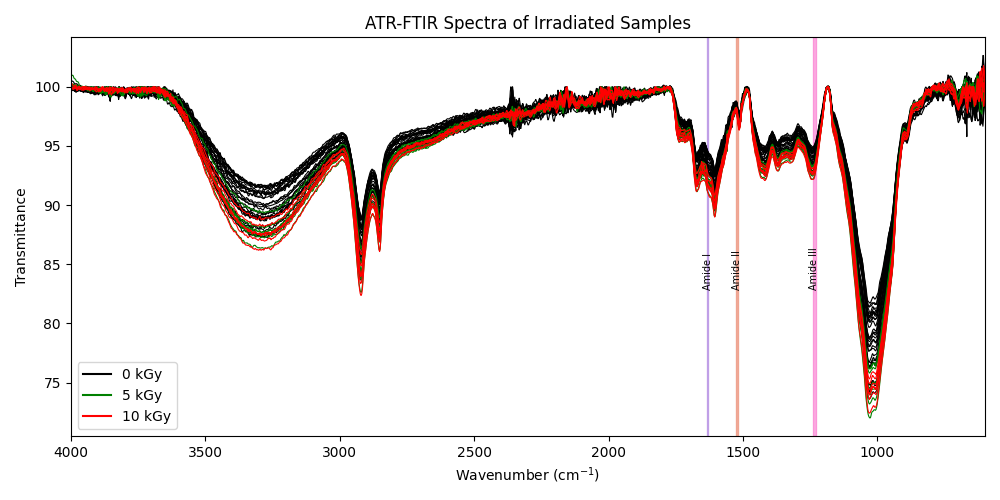

In [6]:
plt.close('all')
from annotator import annotator
irrad_comp, axis = plt.subplots(1,1, figsize=(10,5))

colors = ['black', 'green', 'red']
labels = ['0 kGy', '5 kGy', '10 kGy']
data = [scan_48, kgy5_sn48, kgy10_sn48]

for color, df in zip(colors, data):
    for sample in df.columns:
        axis.plot(wave_no, trans(df[sample]), color=color, linewidth=0.8)

for color, label in zip(colors, labels):
    axis.plot([],[], color=color, label=label)

annotator(axis)
axis.invert_xaxis()
axis.set(title='ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')


axis.legend()
irrad_comp.tight_layout()

In [ ]:
plt.close('all')
irrad_ave, axis = plt.subplots(1,1, figsize=(10,5))

colors = ['black', 'green', 'red']
labels = ['0 kGy (N=30)', '5 kGy (N=6)', '10 kGy (N=6)']
data = [trans(df['average']) for df in [scan_48, kgy5_sn48, kgy10_sn48]]

for color, label, ave in zip(colors, labels, data):
    axis.plot([],[], color=color, label=label)
    axis.plot(wave_no, ave, color=color, linewidth=1)

axis.set(title='Averaged ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')

annotator(axis)
axis.invert_xaxis()

axis.legend()
irrad_ave.tight_layout()